In [1]:
import pandas as pd
import matplotlib.pyplot as plt

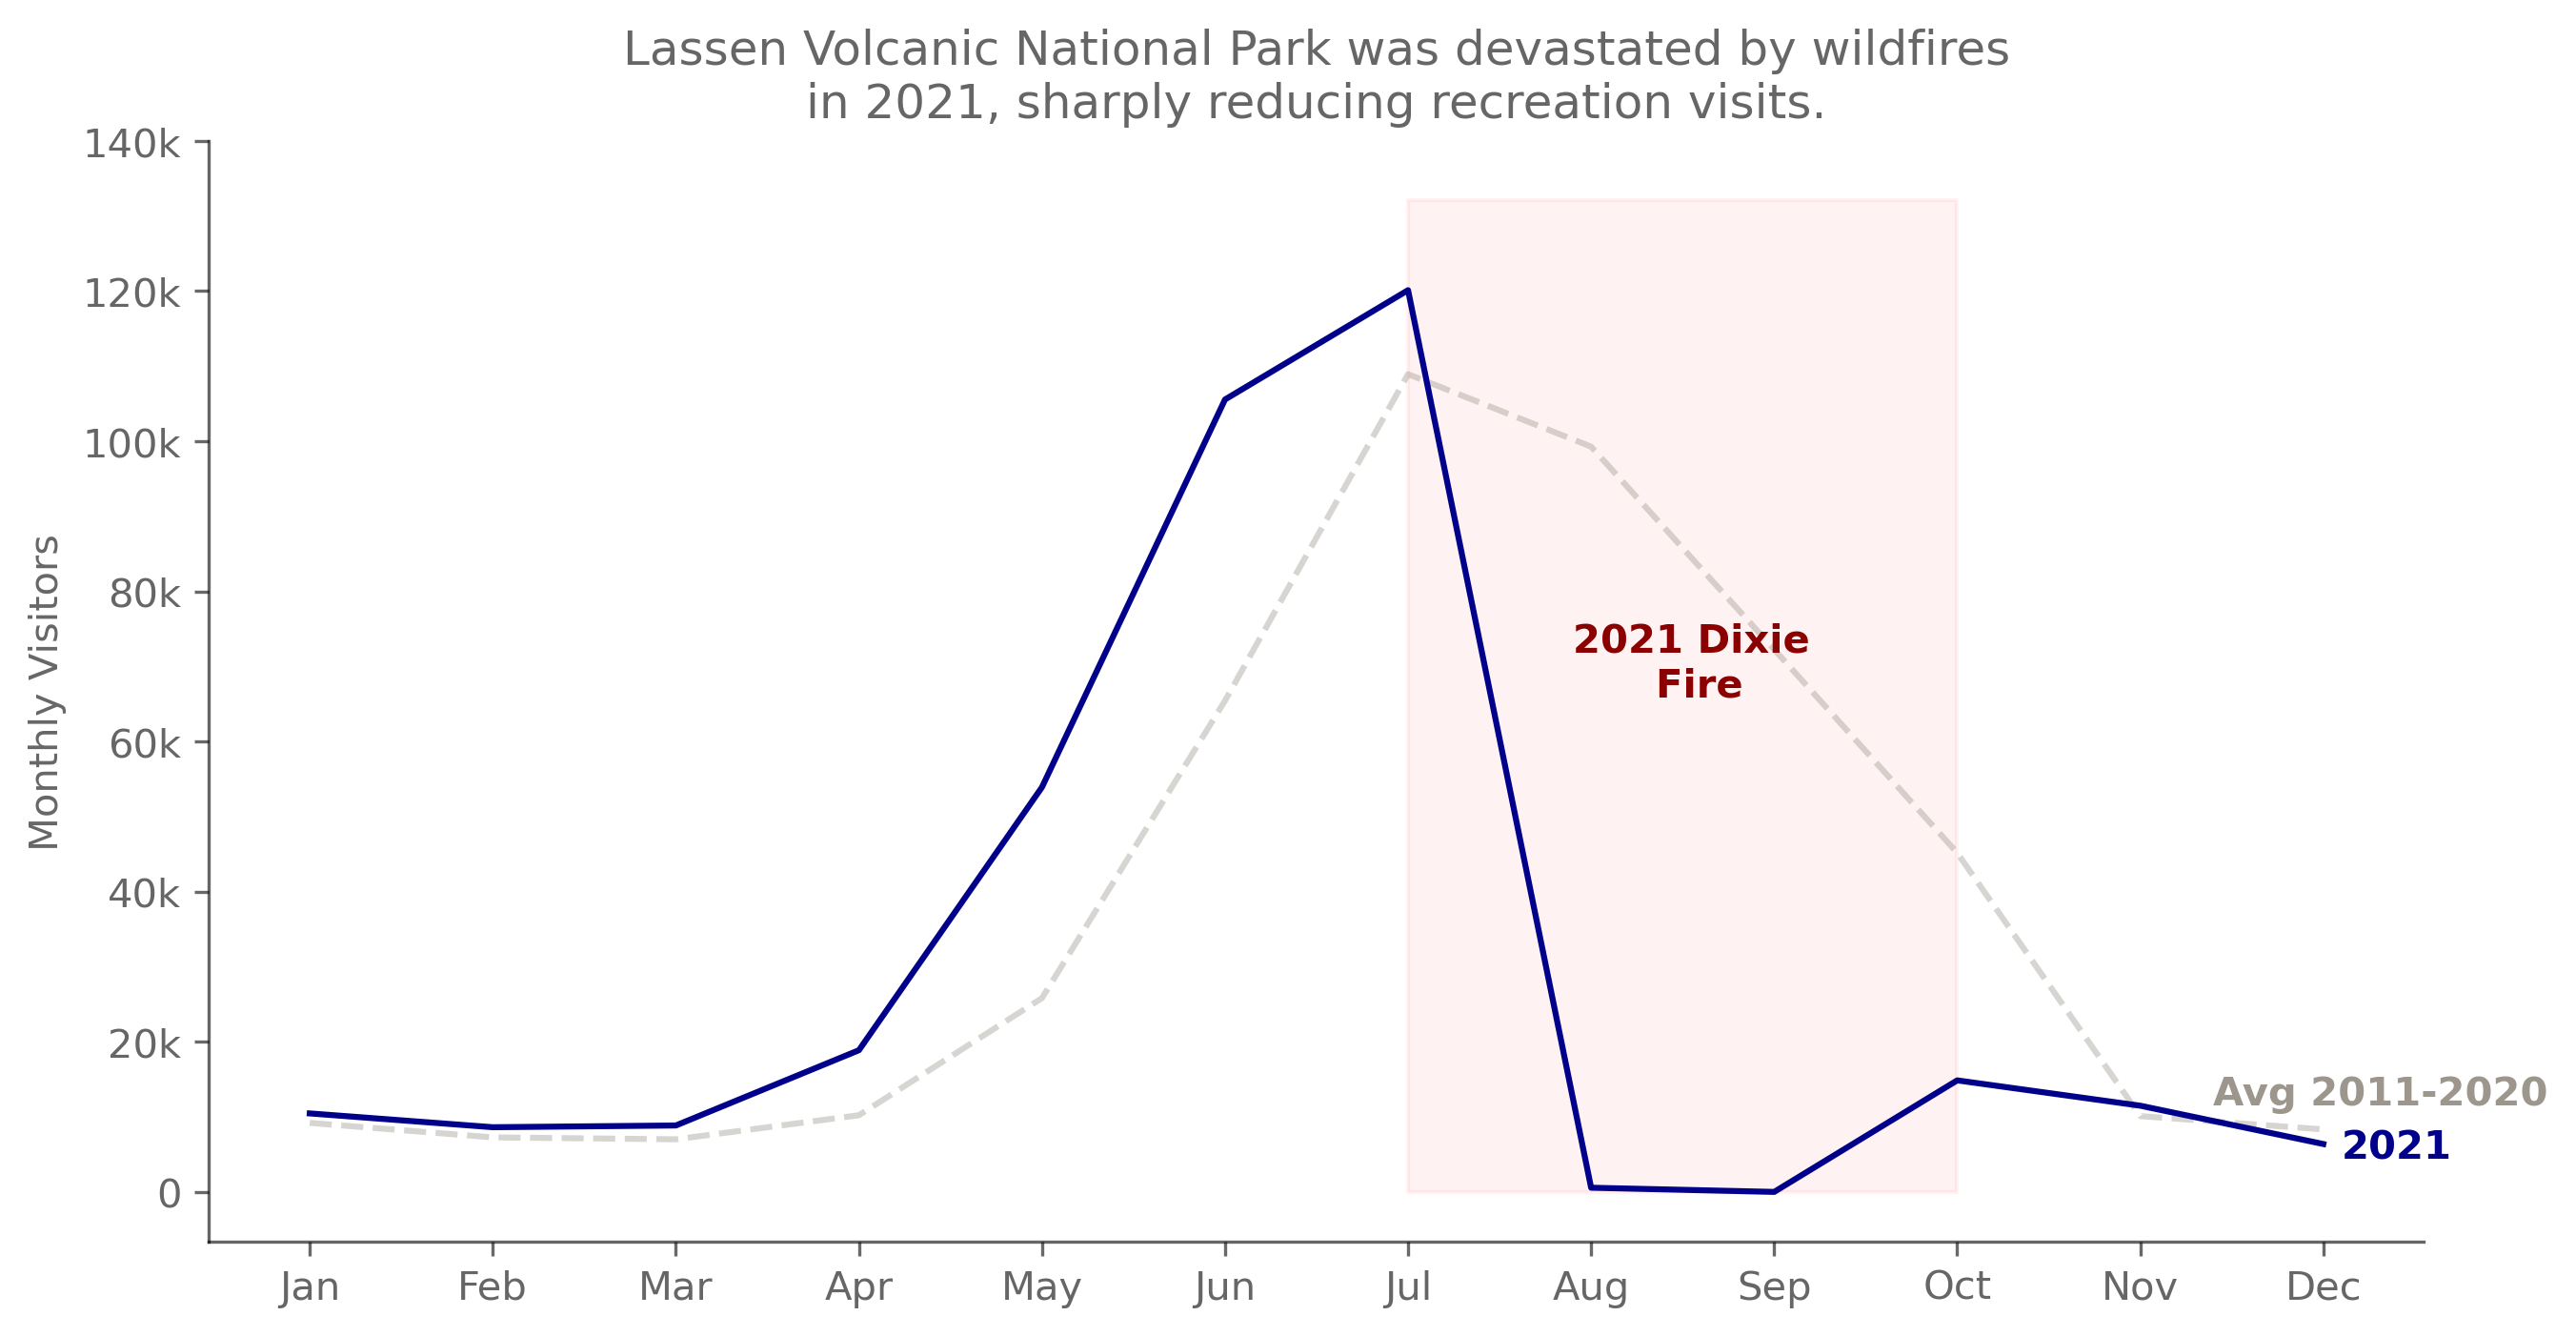

In [15]:
month_start = 'JUL'
month_end = 'OCT'

fig, ax = plt.subplots(figsize=(10,5), dpi=300)

df = pd.read_csv('lassen.csv', skiprows=3)
df.drop(columns=['AnnualTotal', 'Textbox4'], inplace=True)
df.set_index('Year', inplace=True)

for col in df:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''))

df_leading_ten = df.loc[2020:2011]
df_fire = df.loc[2021]

ax.plot(df_leading_ten.mean(), linestyle='--', color='#9D968D', alpha=0.4)
ax.plot(df_fire, linestyle='-', color='darkblue')


ax.fill_between((month_start, month_end), df_fire.max()*1.1, alpha=0.05, color='red')
ax.text(6.9, df_fire.max()*1.1 / 2, '2021 Dixie\n      Fire', color='darkred', weight='bold')

ax.text(10.4, df_leading_ten.mean().iloc[-1]*1.4, 'Avg 2011-2020', color='#9D968D', weight='bold')
ax.text(11.1, df_fire.iloc[-1]*0.7, '2021', color='darkblue', weight='bold')

ax.set_title('Lassen Volcanic National Park was devastated by wildfires\nin 2021, sharply reducing recreation visits.', alpha=0.6)
ax.set_ylabel('Monthly Visitors', alpha=0.6)

ax.set_xticks(list(df.columns), [month.title() for month in list(df.columns)], alpha=0.6)
ax.set_yticks([0] + list(ax.get_yticks()[2:]), [0] + [str(number)[:-5] + 'k' for number in ax.get_yticks()[2:]], alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set(alpha=0.6)
ax.spines['bottom'].set(alpha=0.6)

ax.tick_params(axis='x', color='#00000096')
ax.tick_params(axis='y', color='#00000096')

plt.savefig('lassen_wildfire_chart.png', dpi=300)